In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import HGate, SGate, TGate, UGate
from numpy import pi, random

In [5]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

In [6]:
protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

In [7]:
#Prep for Teleportation Protocol
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "Q"), index=0>, <Qubit register=(1, "A"), index=0>, <Qubit register=(1, "B"), index=0>), clbits=())

In [8]:
#Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "Q"), index=0>, <Qubit register=(1, "A"), index=0>, <Qubit register=(1, "B"), index=0>), clbits=())

In [9]:
#Alice's measures and sends classical bits to Bob
protocol.measure(qubit, a)
protocol.measure(ebit0, b)
protocol.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "Q"), index=0>, <Qubit register=(1, "A"), index=0>, <Qubit register=(1, "B"), index=0>), clbits=())

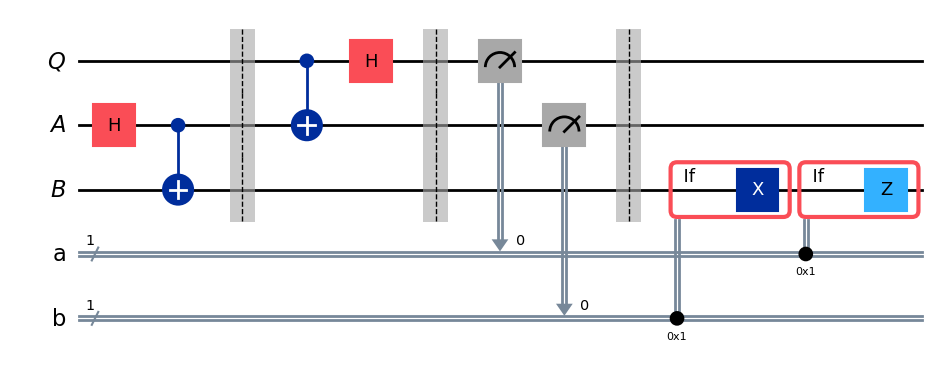

In [10]:
#Bob uses the classical bits to conditionally apply gates
with protocol.if_test((b, 1)):
    protocol.x(ebit1)
with protocol.if_test((a, 1)):
    protocol.z(ebit1)

display(protocol.draw(output='mpl'))

In [11]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
)

In [13]:
display(random_gate.to_matrix())

array([[ 0.87015397+0.j        , -0.46989832-0.14841708j],
       [-0.46023643+0.17610932j, -0.86861275+0.05176706j]])

In [15]:
#Create new circuit including the same bits and qubits used in the teleportation protocol
test_circuit = QuantumCircuit(qubit, ebit0, ebit1, a, b)
test_circuit.append(random_gate, qubit)
test_circuit.barrier()
test = test_circuit.compose(protocol)
test.barrier()
test.append(random_gate.inverse(), ebit1)

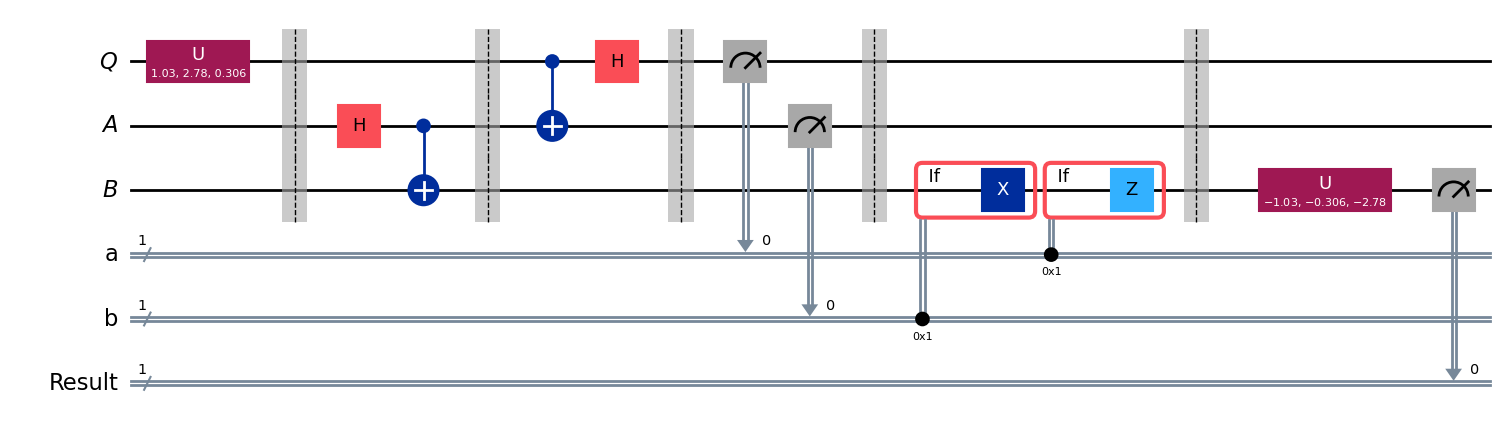

In [16]:
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)
display(test.draw(output='mpl'))

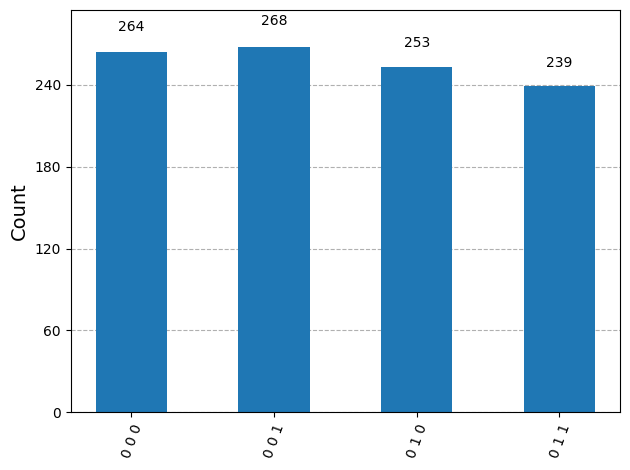

In [17]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

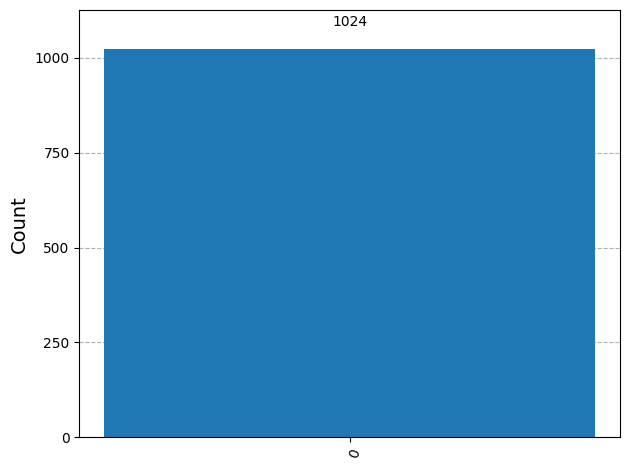

In [18]:
filtered_stats = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_stats))